# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 


$\square$ Suppose matrix $A \in \mathbb{R}^{n\times m}, X\in \mathbb{R}^{m\times l} $
 and $B \in \mathbb{R}^{l\times k} $. 
 
 Denote $X = [col_{1}(X), col_{2}(X), \dots, col_{l}(X)]$.
 
 Then  we obtain following:  $\mathrm{vec}(AXB)= \mathrm{vec}\sum_{i=1}^{l}Acol_{i}(X)e_{i}^{T}B = \sum_{i=1}^{l}\mathrm{vec}[Acol_{i}(X)(B^{T}e_{i})^{T}]\overset{\mathrm{vec}(xy^{T})=y^{T}\otimes x}{ = } \sum_{i=1}^{l}[B^{T}e_{i}] \otimes [Acol_{i}(X)] \overset{(A\otimes B)(C\otimes D)=AC\otimes BD}{=} (B^{T}\otimes A)\sum_{i=1}^{l}(e_{i}\otimes col_{i}(X))\overset{\mathrm{vec}(xy^{T})=y^{T}\otimes x}{ = } (B^{T}\otimes A) \sum_{i=1}^{l} \mathrm{vec}[col_{i}(X)e_{i}^{T}]= (B^{T}\otimes A)\mathrm{vec}{X},$
 
where $\mathrm{vec}{X}= \begin{bmatrix}
col_{1}(X)\\
col_{2}(X)\\
col_{3}(X)\\
\vdots\\
col_{l}(X)
\end{bmatrix}.$
 
 
Consider rowwise reshape. Now we get:

$\mathrm{vec}{X^{T}}= \begin{bmatrix}
row_{1}(X)\\
row_{2}(X)\\
row_{3}(X)\\
\vdots\\
row_{l}(X)
\end{bmatrix}$. 

Then we could obtain next result:

$\mathrm{vec}{(AXB)^{T}}=\mathrm{vec}{(B^{T}X^{T}A^{T})}\overset{\mathrm{vec}{(AXB)} = (B^\top \otimes A)\mathrm{vec}{(X)}}{=} (A\otimes B^{T})\mathrm{vec}{(X^{T})}.$  $\blacksquare$



**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.


$\square \ \ \ $ Suppose $A \in \mathbb{R}^{n\times n}, B\in \mathbb{R}^{m\times m}$. Then the complexity of naive imlementation is $O(nm^{2}+mn^{2})$.  We could use result from the first task $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$,  reshaping x into matrix X with dimensionality $m\times n$. Such way we could avoid the direct computation of Kronecker product, but complexity will be the same (especially for large matrices). :( 

Although such way will improve performance for matrices, which fits to cache. Because in Kronecker case it will take a lot of time to get data from RAM, while in vec case it reshapes matrix only at the end and matrices with $n\times n$ shapes have more chances to fit into cache, than $nm\times nm$. $ \blacksquare$ 


- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.

$\square \ \ \ $ Suppose matrix $A \in \mathbb{R}^{n\times n}, B\in \mathbb{R}^{m\times m} $.


$\Lambda_A $ consists of eigenvalues and $ S_A$ includes eigenvectors of matrix A. The same for matrix B.

$x \in \mathbb{R}^{n}$ is an eigenvector of matrix A for eigenvalue $\lambda_{A}$ and $y \in \mathbb{R}^{m}$  is an eigenvector of matrix B with eigenvalue $\lambda_{B}.$

Denote Kronecker sum $A \oplus B = A\otimes I + I \otimes B$. 

Then $(A \oplus B )(x\otimes y) = (A\otimes I)(x\otimes y) + (I \otimes B)((x\otimes y) \overset{(A\otimes B)(C\otimes D)=AC\otimes BD}{=} (Ax\otimes y) + (x \otimes By) \overset{Ax=\lambda_{A} x, By=\lambda_{B}y}{=}\lambda_{A}(x\otimes y)+\lambda_{B}(x\otimes y) = (\lambda_{A}+\lambda_{B})(x\otimes y).$

So  $x+y$  is an eigenvector of $A \oplus B$ with eigenvalue $\lambda_{A}+\lambda_{B}.$

Final spectrum is following:

spec($A \oplus B$) = {$\lambda_{A}+\lambda_{B}: \lambda_{A}\in$ spec(A), $\lambda_{B}\in$ spec(B)}.  $ \ \ \blacksquare$


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
    
  $\square$  
  
  - For Richardson iteration we have next equation for convergence: $e_{k+1}=(I-\tau A)e_{k}$,  where $\tau_{opt} = \frac{1}{\lambda_{max}+\lambda_{min}}.$
  
   So, $\|e_{k}\|_2=q^{k}\|e_{0}\|_2$. Then we get:
  
 $\varepsilon \le q^{k}, \ \ $where $q = \frac{cond(A)-1}{cond(A)+1}$.
 
 $k\le \frac{ln\varepsilon}{ln q}\approx 4605170,18\Rightarrow k\le 4605171$. 
  
 
  
  - For Chebyshev iteration we have next equation for convergence: $e_{k+1}=Cq^{k}e_{0}$,  where $q = \frac{\sqrt{cond(A)}-1}{\sqrt{cond(A)}+1}.$
  
  Suppose $C\approx 1$, then $\varepsilon\le q^{k} \Leftrightarrow k \le \frac{ln \varepsilon}{ln q}\approx 4605,16\Rightarrow k\le 4606.$
  
  
  - For Conjugate gradient we get the same number of iterations, as for Chebyshev method. $\ \ \ \blacksquare$
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

In [7]:
# Your solution is here
import numpy as np
import time
from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
# naive implementation
N_array = [5, 10, 20, 30, 50, 70, 100, 110]

times_kron = []
times_vec = []

for i in tqdm(range(len(N_array))):
    N = N_array[i]
    A = np.random.rand(N,N)
    B = np.random.rand(N,N)
    x = np.random.rand(N*N)
#     kronecker imlementation
    time_start = time.time()
    np.kron(A, B).dot(x)
    times_kron.append(time.time()-time_start)
#     vec implementation
    X = x.reshape(N, N)
    time_start = time.time()
    (A.dot(B)).dot(X).T.flatten()
    times_vec.append(time.time()-time_start)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:02<00:00,  2.82it/s]


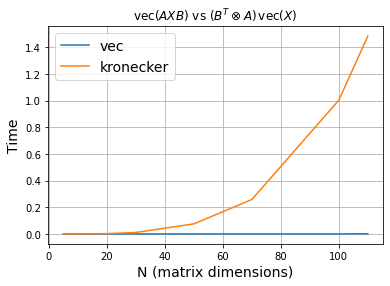

In [6]:
plt.title('$\mathrm{vec}(AXB)$ vs $(B^{T} \otimes A)\, \mathrm{vec}(X)$')
plt.plot(N_array, times_vec, label="vec")
plt.plot(N_array, times_kron, label="kronecker")

plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel("N (matrix dimensions)", fontsize=14)
plt.ylabel("Time", fontsize=14);

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import diags
import scipy.sparse.linalg as spla

In [8]:
diagonals = [i/1000 for i in range(1,1000,1)]+[1]+[1000]
A = diags(diagonals)

niters = 5000
lam_min = 1e-3
lam_max = 1e3

acc = 1e-4

roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]

taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]

n = A.shape[0]
rhs = np.random.randn(n)
x0 = np.zeros(n)
x = np.zeros(n)
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r)]


# Implementation may be non-optimal if number of iterations is not power of two
def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

good_perm = good_shuffle([i for i in range(1, niters+1)])


# while (np.linalg.norm(r) > acc):
for i in range(niters):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    res_cheb.append(np.linalg.norm(r))
    
print(np.linalg.norm(A @ x - rhs))

0.013127885682631348


In [9]:
conv_cg = []

def cl_cg(x):
    conv_cg.append(x.copy())
    
x_cg, info = spla.cg(A, rhs, callback=cl_cg, x0=x0, tol=acc)
print(np.linalg.norm(A @ x_cg - rhs))

0.0030796645125646762


In [10]:
from tqdm import tqdm
def richardson(A, b, tau, x0, tol, max_iter):
    x = x0.copy()
    conv = []
    for i in tqdm(range(max_iter)):
        x = x - tau * (A @ x - b)
        conv.append(x)
        if np.linalg.norm(A @ x - b) < tol:
            break
    return x, conv

f  = 1293422 # sorry not so much memory 4605171

x_rich, conv_rich = richardson(A, rhs, 2 / (lam_min+lam_max), x0,
                               acc, f)
print(np.linalg.norm(A @ x_rich - rhs))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1293422/1293422 [00:44<00:00, 28946.61it/s]

0.129881211446834


<ipython-input-11-6ee05cea2979>:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_cg], label="CG")


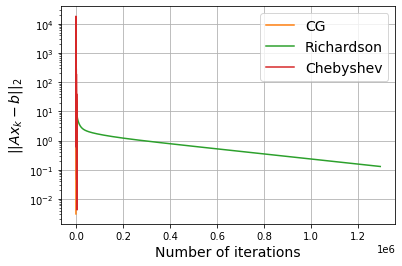

In [11]:
plt.plot("Convergence")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_cg], label="CG")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_rich], label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("$||Ax_k - b||_2$", fontsize=14);

<ipython-input-12-b86b5ee9b065>:2: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_cg], label="CG")


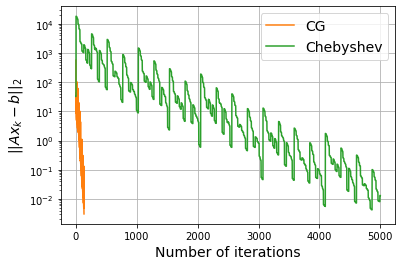

In [12]:
plt.plot("Convergence")
plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_cg], label="CG")
# plt.semilogy([np.linalg.norm(A @ x - rhs) for x in conv_rich], label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.legend(fontsize=14)
plt.grid(True)
plt.xlabel("Number of iterations", fontsize=14)
plt.ylabel("$||Ax_k - b||_2$", fontsize=14);

Seems like Congugate gradient approach works much better, than Chebyshev or Richardson. 

Analytical results was rather correct

## Problem 2 (40 pts)

### Spectral graph partitioning and inverse iteration


Given connected graph $G$ and its corresponding graph Laplacian matrix $L = D - A$ with eigenvalues $0=\lambda_1, \lambda_2, ..., \lambda_n$, where $D$ is its degree matrix and $A$ is its adjacency matrix, *Fiedler vector* is an eignevector correspondng to the second smallest eigenvalue $\lambda_2$ of $L$. Fiedler vector can be used for graph partitioning: positive values correspond to the one part of a graph and negative values to another.

### Inverse power method (15 pts)

To find the Fiedler vector we will use the inverse iteration with adaptive shifts (Rayleigh quotient iteration). 

* (5 pts) Write down the orthoprojection matrix on the space orthogonal to the eigenvector of $L$, corresponding to the eigenvalue $0$ and prove (analytically) that it is indeed an orthoprojection.

$\square $ Find eigenvector of L, corresponding to eigenvalue 0:

For $\vec{x}\neq 0 : Lx = 0  \Leftrightarrow (D-A)\vec{x} = 0 \Leftrightarrow D\vec{x}=A\vec{x}\Rightarrow \vec{x} = [1,1\dots, 1] = \vec{1}.$

Space orthogonal to $\vec{x}$ has $\vec{n}=\vec{x}$, where $\vec{n}$ - normal vector.

Consider projection of $\vec{y}$ on $\vec{x}$: 

proj$_{\vec{x}}\vec{y} =P\vec{y} = \frac{\vec{x}\vec{x}^{T}}{\vec{x}^{T}\vec{x}}\vec{y}$. 

$P = \frac{\vec{x}\vec{x}^{T}}{\vec{x}^{T}\vec{x}} $ is a projection matrix on space with $\vec{x},$ because $P=P^{T}$, as $(\vec{x}\vec{x}^{T})^{T}=\vec{x}\vec{x}^{T}$ and $P^{2} = \frac{\vec{x}\vec{x}^{T}\vec{x}\vec{x}^{T}}{(\vec{x}^{T}\vec{x})^{2}} = P$. 

For projection on the space orthogonal to $\vec{x}$ we need to do subtract from $\vec{y}$ previously obtained projection. So we get the following: $P\vec{y} = \vec{y} - \frac{\vec{x}\vec{x}^{T}}{\vec{x}^{T}\vec{x}}\vec{y}.$ So our $P = I - \frac{\vec{x}\vec{x}^{T}}{\vec{x}^{T}\vec{x}}$ is orthoprojection of $\vec{y}$ on the space orthogonal to $\vec{x}$. As $\vec{x} = \vec{1}$ in our case, then we get: $P = I - \frac{1}{n}\vec{1}\vec{1}^{T}.$



* (5 pts) Implement the spectral partitioning as the function ```partition```:

In [10]:
def orthoprojection(x):
    n = x.shape[0]
    e = np.ones([n,1])
    e_t = np.ones([1,n])
    I = diags([1.] * n)
    P_x = I.dot(x) - (e.dot(e_t)).dot(x)/n
    return P_x

In [11]:
x = np.ones(10)

In [12]:
# check that orthoprojection of vector x on orthogonal to vector [1,1,1,1,...1] space equals to zeros.
orthoprojection(x)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
def halt(eigvs_cur, eigvs_prev, eps):
    stop = False
    if np.abs(eigvs_cur-eigvs_prev)/np.abs(eigvs_cur) <= eps:
        stop=True
    return stop

In [14]:
from tqdm import tqdm
import scipy
from scipy.sparse.linalg import inv as inv
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (int)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# eps - relative tolerance (float)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)

def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    x = x0
    D = diags(A.sum(axis=1).flatten().tolist()[0]).tocsc()
    L = D - A
    I = diags([1.] * L.shape[0]).tocsc()
    eigs = np.zeros(num_iter_fix + num_iter_adapt)
    stop = False
    
    for j in tqdm(range(num_iter_fix)):
        x = inv(L-shift*I).dot(x)
        x = orthoprojection(x)
        x_norm = np.linalg.norm(x, 2) 
        x = x / x_norm  
        l = L.dot(x).T.dot(x)
        eigs[j] = l
        if j>2:
            stop = halt(eigs[j], eigs[j-1], eps)
            if stop: 
                return x, eigs[:(j+1)]  
    for i in tqdm(range(num_iter_adapt)):
        shift_k = L.dot(x).T.dot(x) / x.dot(x)
        x = inv(L-shift_k*I).dot(x)
        x = orthoprojection(x)
        x_norm = np.linalg.norm(x, 2) 
        x = x / x_norm  
        l = L.dot(x).T.dot(x)
        eigs[num_iter_fix+i] = l
        stop = halt(eigs[num_iter_fix+i], eigs[num_iter_fix+i-1], eps)
        if stop:
            return x, eigs[:(num_iter_fix+i+1)]
    return x, eigs  

#### Algorithm must halt before `num_iter_fix + num_iter_adapt` iterations if the following condition is satisfied $$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ at some step } k.$$

Do not forget to use the orthogonal projection from above in the iterative process to get the correct eigenvector.
It is also a good idea to use ```shift=0``` before the adaptive stragy is used. This, however, is not possible since the matrix $L$ is singular, and sparse decompositions in ```scipy``` does not work in this case. Therefore, we first use a very small shift instead.

* (3 pts) Generate a random `lollipop_graph` using `networkx` library and find its partition. [Draw](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) this graph with vertices colored according to the partition.

* (2 pts) Start the method with a random initial guess ```x0```, set ```num_iter_fix=0``` and comment why the method can converge to a wrong eigenvalue.

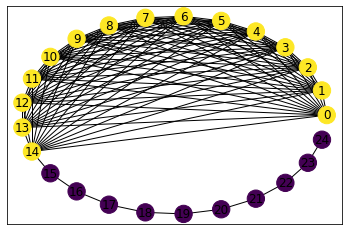

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx

m = 15
n = 10
ll  = nx.lollipop_graph(m, n)


# plot correct partition
correct_partition = [1]*m + [0]*n
nx.draw_networkx(ll, pos=nx.layout.circular_layout(ll),  node_color=correct_partition)

In [16]:
A = nx.adjacency_matrix(ll).asfptype()
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 1e-1, 10, 45, x0, 1e-10)

  4%|███▋                                                                               | 2/45 [00:00<00:00, 81.06it/s]


### Obtained partition

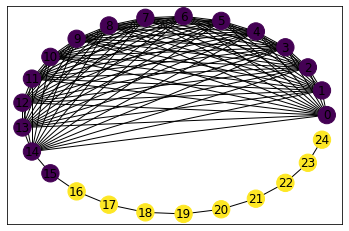

In [17]:
nx.draw_networkx(ll, pos=nx.layout.circular_layout(ll),  node_color=np.sign(x))

In [19]:
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 1e-1, 0, 10, x0, 1e-10)

0it [00:00, ?it/s]
 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00, 75.49it/s]


### Partition with random initial guess x0 and num_iter_fix=0

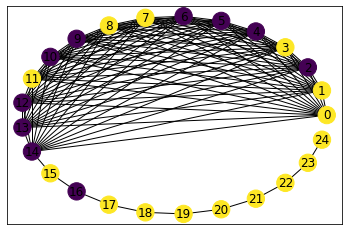

In [20]:
nx.draw_networkx(ll, pos=nx.layout.circular_layout(ll),  node_color=np.sign(x))

Previous partition was better, than obtained one with random initial guess x0 and num_iter_fix=0. It's so, because  when we set random guess x0, it means, that we are looking for eigenvalue close corresponding to x0 eigenvalue. And it means if we have a bad guess we couldn't provide convergence of this method to the second eigenvalue. 

### Spectral graph properties (15 pts)

* (5 pts) Prove that multiplicity of the eigenvalue $0$ in the spectrum of the graphs Laplacian is the number of its connected components.

$\square \ \ \$ Prove that the graph G has k connected components iff the multiplicity of the eigenvalue 0 equals to k.


For proving use the following fatcs:

1) Each Laplacian matrix has an eigenvalue equals to 0 and corresponding to it eigenvector equals to $[1,1,1,\dots,1].$

2) For connected graph G the multiplicity of eigenvalue 0 equals to 1. (We could apply the Perron-Frobenius theorem to $cI-L$, where c is a large real number).

3) If Laplacian matrix is block diagonal with blocks $L_{1}, L_{2}, \dots L_{k}$, then det $L$ = det$L_{1}$det $L_{2}$ $\dots$ det $L_{k}$.

$\Rightarrow$ Suppose graph G has k connected components $\Rightarrow$ Adjacency matrix can be block diagonal with k blocks $\Rightarrow$ Laplacian matrix has k blocks. Each block has only one zero eigenvalue. Due to fact, that det $L$ = det$L_{1}$det $L_{2}$ $\dots$ det $L_{k}$ multiplicity of zero equals to sum of multiplicity of each block $\Rightarrow$ multiplicity of zero equals to k.

$\Leftarrow$ Multiplicity of zero equals to k $\Rightarrow$ there are k blocks in the Laplacian $\Rightarrow$ Graph has k connected components. $ \ \ \blacksquare$




* (10 pts) The second-smallest eigenvalue of $L(G)$, $\lambda_2(L(G))$, is often called the algebraic connectivity of the
graph $G$. A basic intuition behind the use of this term is that a graph with a higher algebraic
connectivity typically has more edges, and can therefore be thought of as being “more connected”.  
To check this statement, create few graphs with equal number of vertices using `networkx`, one of them should be $C_{30}$ - simple cyclic graph, and one of them should be $K_{30}$ - complete graph. (You also can change the number of vertices if it makes sense for your experiments, but do not make it trivially small).
    * Find the algebraic connectivity for the each graph using inverse iteration.
    * Plot the dependency $\lambda_2(G_i)$ on $|E_i|$.
    * Draw a partition for a chosen graph from the generated set.
    * Comment on the results.

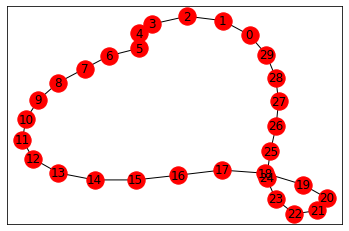

In [21]:
c = 30
cy  = nx.cycle_graph(c)
nx.draw_networkx(cy, node_color="red")

  4%|███▋                                                                               | 2/45 [00:00<00:00, 65.95it/s]


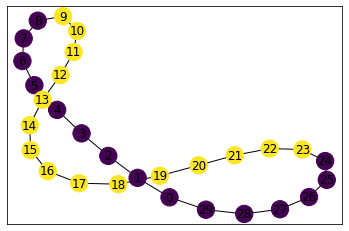

In [22]:
A = nx.adjacency_matrix(cy).asfptype()
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 1e-1, 10, 45, x0, 1e-10)
nx.draw_networkx(cy,  node_color=np.sign(x))

In [23]:
print('Algebraic connectivity is equal to ', eigs[-1])

Algebraic connectivity is equal to  0.04370479853238875


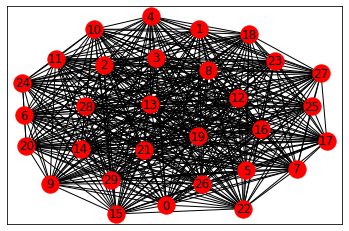

In [24]:
k = 30
co = nx.complete_graph(k)
nx.draw_networkx(co, node_color="red")

 30%|████████████████████████▉                                                          | 3/10 [00:00<00:00, 85.95it/s]


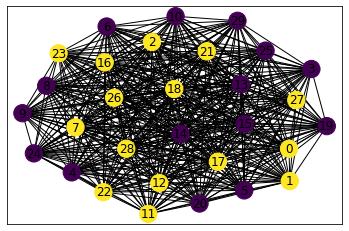

In [25]:
A = nx.adjacency_matrix(co).asfptype()
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 1e-1, 10, 45, x0, 1e-10)
nx.draw_networkx(co,  node_color=np.sign(x))

In [26]:
print('Algebraic connectivity is equal to ', eigs[-1])

Algebraic connectivity is equal to  30.000000000000007


Now try to understand how algebraic connectivity for the each graph conects with the number of edges. Strat with full $K_{30}$ graph and then remove random edges.

In [27]:
def delete_k_random_edges(k, graph, dim):
    
    x = np.random.randint(dim, size = k)
    y = np.random.randint(dim, size = k)
    
    for i in range(k):
        try:
            graph.remove_edge(x[i], y[i])  
        except Exception:
            continue
    return graph

In [28]:
from tqdm import tqdm

eigenvals = []
graphs = []
eigvecs = []
num_edges = []
N = 20
k = 20 #each step will delete from graph less or equal to k random edges 
K = 30 
# start graph
co = nx.complete_graph(K)


for i in tqdm(range(N)):
    A = nx.adjacency_matrix(co).asfptype()
    x0 = np.random.randn(A.shape[0])
    x, eigs = partition(A, 1e-1, 5, 20, x0, 1e-10)
#     append rezults
    graphs.append(co)
    eigvecs.append(x)
    eigenvals.append(eigs[-1])
    num_edges.append(len(co.edges))
#     delete random edges
    co = delete_k_random_edges(k, co, K)

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00, 94.08it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 111.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 93.13it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 131.86it/s]

 20%|████████████████▍                                                                 | 4/20 [00:00<00:00, 105.45it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 78.37it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 80.86it/s]

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 98.24it/s]

 15%|████████████▍              

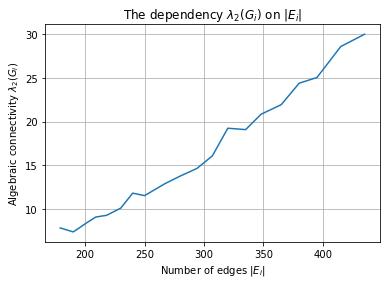

In [29]:
plt.title("The dependency $\lambda_2(G_i)$ on $|E_i|$")
plt.plot(num_edges[::-1], eigenvals[::-1] )
plt.xlabel('Number of edges $|E_i|$')
plt.grid()
plt.ylabel('Algebraic connectivity $\lambda_2(G_i)$')
plt.show();


As we can see with increasing the number of edges , the algebraic connectivity is also increases. 

Create color images for several partitions 

Num of edges is  435


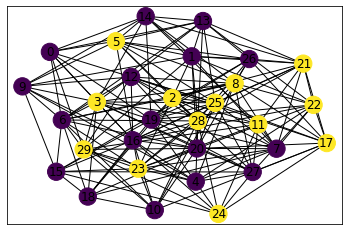

In [30]:
print('Num of edges is ', num_edges[0])
nx.draw_networkx(graphs[0],  node_color=np.sign(eigvecs[0]))


Num of edges is   280


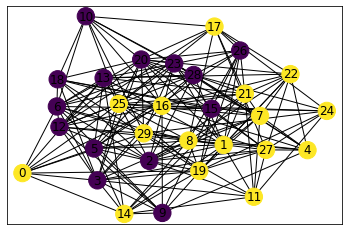

In [31]:
print('Num of edges is  ', num_edges[10])
nx.draw_networkx(graphs[10],  node_color=np.sign(eigvecs[10]))

Num of edges is  179


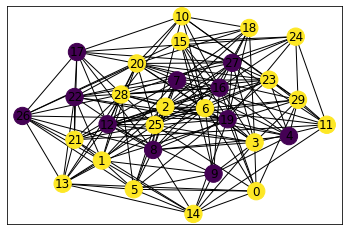

In [32]:
print('Num of edges is ', num_edges[19])
nx.draw_networkx(graphs[19],  node_color=np.sign(eigvecs[19]))

### Image bipartition (10 pts)

Let us deal here with a graph constructed from a binarized image.
Consider the rule, that graph vertices are only pixels with $1$, and each vertex can have no more than $8$ connected vertices (pixel neighbours), $\textit{i.e}$ graph degree is limited by 8.
* (3 pts) Find an image with minimal size equal to $(256, 256)$ and binarize it such that graph built on black pixels has exactly $1$ connected component.
* (5 pts) Write a function that constructs sparse adjacency matrix from the binarized image, taking into account the rule from above.
* (2 pts) Find the partition of the resulting graph and draw the image in accordance with partition.

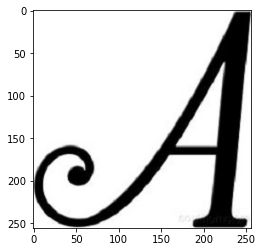

In [33]:
# Your solution is here
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt   
from tqdm import tqdm
from scipy import sparse
# Read Image
img = mpimg.imread('2.jpg') 
  
# Output Images 
plt.imshow(img) 

In [34]:
# binarize image
img = (img < 100).astype(float)[:,:, 0]

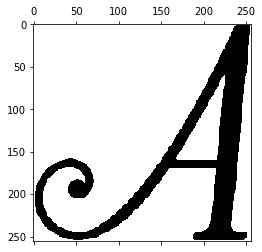

In [35]:
plt.spy(img)

Graph of black pixels has only one connected component.

In [36]:
# create numeration for vertexes
def vertex_numeration(img):
    vert_numers = []
    for i in tqdm(range(img.shape[0])):
        for j in range(img.shape[1]):
            if img[i,j]==1.:
                vert_numers.append([i, j])
    return vert_numers

In [37]:
# check neighbours for pixel
def check_neighbours(A, index_x, index_y, vertex_list):
    neighbours = []
    ind_x = [index_x-1, index_x, index_x+1]
    ind_y = [index_y-1, index_y, index_y+1]
    for i in range(len(ind_x)):
        for j in range(len(ind_y)): 
            if A[ind_x[i], ind_y[j]]==1:
                neighbours.append(vertex_list.index([ind_x[i], ind_y[j]]))
    return neighbours

In [38]:
def create_adjacency_matrix(img):
    vert_numers = vertex_numeration(img) #create vertex numeration
    neighbours_for_vertexes = [] #neighbour indexes for each black pixel
    for i in tqdm(range(len(vert_numers))):
        neighbours_for_vertexes.append(check_neighbours(img, vert_numers[i][0],vert_numers[i][1], vert_numers))
#     create matrix
    A = np.zeros([len(vert_numers),len(vert_numers)])
#     fill neighbours
    for i in range(len(vert_numers)):
        A[i, neighbours_for_vertexes[i]] = 1.
    A = A - np.eye(A.shape[0]) #because there are no loops
    return sparse.csr_matrix(A) 

In [39]:
A = create_adjacency_matrix(img)

100%|███████████████████████████████████████████████████████████████████████████| 12868/12868 [00:35<00:00, 365.14it/s]


In [ ]:
x0 = np.random.randn(A.shape[0])
x, eigs = partition(A, 1e-4, 4, 10, x0, 1e-10)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

In [ ]:
vert_numers = vertex_numeration(img)  #collect againg the numeration of vertexes

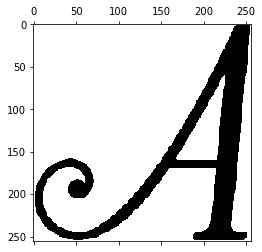

In [42]:
plt.spy(img) #first image

In [43]:
img_ = img.copy()

In [44]:
# color image
for i in range(len(vert_numers)):
    if np.sign(x[i])<0:
        img_[vert_numers[i][0], vert_numers[i][1]] = 2. #another color

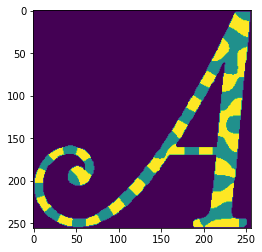

In [45]:
plt.imshow(img_)

## Problem 3 (25 pts)

**Disclaimer**: this problem is released first time, so some typos can be found. 

## Mathematical model (Navier-Stokes equations)

The governing equations for two-dimensional incompressible
flows can be written in a dimensionless form as:

\begin{equation}\tag{1}
\dfrac{\partial \omega}{\partial t} = \dfrac{1}{Re} \big(\dfrac{\partial^2 \omega}{\partial x^2} + \dfrac{\partial^2 \omega}{\partial y^2}\big) - \big(\dfrac{\partial \psi}{\partial y} \dfrac{\partial \omega}{\partial x} - \dfrac{\partial \psi}{\partial x} \dfrac{\partial \omega}{\partial y}\big),
\end{equation}

along with the kinematic relationship between vorticity $\omega(x,y,t)$ and stream function $\psi(x,y,t)$ according to the Poisson equation, which is given as:

\begin{equation}\tag{2}
\dfrac{\partial^2 \psi}{\partial x^2} + \dfrac{\partial^2 \psi}{\partial y^2} = -\omega.
\end{equation}

We consider equations (1) and (2) in the computational domain $\Omega = [0, 2\pi] \times [0, 2\pi]$ and impose the following periodic boundary conditions:

$$\omega(x,0,t) =\omega(x, 2\pi, t), \omega(0,y,t) =\omega(2\pi, y, t), t \geq 0,$$
and the same for $\psi(x,y,t)$.

Note: the Reynolds number, referred to as $Re$, is a fundamental physical constant that in particular determines whether the fluid flow is laminar or turbulent.

## The animation below represents a particular solution of the Navier-Stokes equations (1) and (2) and you will get it in the end of this problem
<img src="vorticity_N1024_Re10000.0_tau0.001.gif" />

# Fourier-Galerkin pseudospectral method

Fourier series expansion based methods are often used for solving problems with periodic boundary conditions. One of the most accurate methods for solving the Navier–Stokes equations in periodic domains is **the pseudospectral method**, which exploits the Fast Fourier Transform (FFT) algorithm. 

Outline: the main idea of spectral methods is to write the solution of a differential equation as a sum of certain "basis functions" (e.g. Fourier series, Chebyshev polynomials etc) and then to choose the coefficients in the sum in order to satisfy the differential equation as well as possible.

Comprehensive survey of such methods can be found in [this book](https://depts.washington.edu/ph506/Boyd.pdf).

### Discrete Fourier Transform

We discretize the domain $[0,L_x]\times[0, L_y]$ by introducing a computation **grid** consisting of $N_x \times N_y$ equally spaced points.

The discrete grid coordinates for $i = 0, 1, \ldots, N_x$ and $j = 0, 1, \ldots, N_y$ are given by:

$$x_i = \frac{i L_x}{N_x}, y_j = \frac{j L_y}{N_y}.$$

Note, that since the domain is periodic $x_0 = x_{N_x}$ and $y_0 = y_{N_y}$.

 Then, any discrete function $u_{i,j} = u(x_i,y_j)$ can be transformed to the Fourier space using the Discrete Fourier Transform (DFT):

$$ \tilde{u}_{m,n} = \sum_{i = 0}^{N_x - 1}\sum_{j = 0}^{N_y - 1} u_{i, j}e^{
-\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

and its inverse transform is:

$$ u_{i,j} = \frac{1}{N_x N_y} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n}e^{\mathbf{i}(\frac{2\pi m}{L_x}x_i + \frac{2\pi n}{L_y}y_j)},$$

where $i$ and $j$ represent indices for the physical space (i.e. coordinates in the introduced grid), $m$ and $n$ are indices in the Fourier space (i.e. frequencies). 


We also introduce wavenumbers:

$$k_x = \frac{2\pi m}{L_x}, k_y = \frac{2 \pi n}{L_y}.$$


**Bonus question:** how DFT coefficients $\tilde{u}_{m,n}$ relate to coefficients in the truncated Fourier series of $u(x,y)$?

### Differentiation
In Fourier space we can easily perform differentiation with respect to $x$ and $y$. For example, the
first and the second order derivatives of any function $u$ in discrete
domain becomes:

$$ \left(\dfrac{\partial u}{\partial x}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = \frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (\mathbf{i}k_x) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

$$ \left(\dfrac{\partial^2 u}{\partial x^2}\right)_{i,j} = \frac{1}{N_x N_y}\sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\sum_{n = -\frac{N_y}{2}}^{\frac{N_y}{2} - 1} \tilde{u}_{m, n} (-k_x^2) e^{\mathbf{i}(k_x x_i + k_y y_j)}, $$

and similarly for the derivatives w.r.t. $y$ 

Assume $L_x = L_y = L = 2\pi$, $N_x = N_y = N$ for simplicity. Then, differentiation $\frac{\partial}{\partial x}$ in the Fourier space can be implemented as follows:

In [99]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
def dudx(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return u_tilde * (1j * k1d)

 Note, we use ```np.fft.fftfreq(N)``` to determine the order of frequencies for certain ```numpy``` implementation (see the documentation of ```numpy.fft``` module for details).

Consider the following example:

In [101]:
L = 2*np.pi # size of computational domain
d = 7
N = 2**d

In [102]:
# discretize the domain $[0, 2\pi] \times [0, 2\pi]$ with uniform grid

ls = np.linspace(0, L, N, endpoint=False)
xx, yy = np.meshgrid(ls, ls, indexing='xy')

# define simple periodic function
u = np.sin(xx) * np.sin(yy) 

# first, compute du/dx analytically
u_x = np.cos(xx) * np.sin(yy) 

# next, compute du/dx in Fourier space
u_tilde = np.fft.fft2(u)

u_tilde_x = dudx(u_tilde, N)
u_x_fourier = np.fft.ifft2(u_tilde_x)

# check the result
err = np.linalg.norm(u_x - u_x_fourier)
print("error = ", err)

error =  5.43739351081977e-13


- (5 pts) Similarly with the implementation of ```dudx(u_tilde, N)``` given above, your first task is to implement other derivatives arising in the Navier-Stokes equtions (1), (2). Loops are prohibited!

In [103]:
def dudy(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return (u_tilde * (1j * k1d)).T

def d2udx2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return -u_tilde * (k1d * k1d)
 
def d2udy2(u_tilde, N):
    k1d = np.fft.fftfreq(N) * N
    return -u_tilde * (k1d * k1d)

### Navier-Stokes equations in the Fourier space

After transforming Eq. (1) and Eq. (2) to the Fourier space, the governing equations become:

\begin{equation}\tag{3}
\frac{\partial \tilde{\omega}_{m,n}}{\partial t} = \frac{1}{Re}[(-k_x^2 - k_y^2)\tilde{\omega}_{m,n}] - \tilde{N},
\end{equation}

\begin{equation}\tag{4}
(-k_x^2 - k_y^2)\tilde{\psi}_{m,n} = -\tilde{\omega}_{m,n},
\end{equation}

where $\tilde{N}$ represents the non-linear term which is computed using 2D convolutions as follows:

$$\tilde{N} = (\mathbf{i}k_y \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_x \tilde{\omega}_{m,n}) - (\mathbf{i}k_x \tilde{\psi}_{m,n}) \circ (\mathbf{i}k_y \tilde{\omega}_{m,n}),$$

i.e. multiplications in physical space become convolutions in the Fourier space.

To clarify where these convolutions come from, consider two discrete functions $u$ and $v$ represented by their DFT (1D for simplicity):

$$ u_{i} = \frac{1}{N_x} \sum_{m = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1} \tilde{u}_{m}e^{\mathbf{i}\frac{2\pi m}{L_x}x_i},$$

$$ v_{i} = \frac{1}{N_x} \sum_{n = -\frac{N_x}{2}}^{\frac{N_x}{2} - 1}\tilde{v}_{n}e^{\mathbf{i}\frac{2\pi n}{L_x}x_i}.$$

Then, the direct multiplication results in:
$$ u_{i} v_{i} = \frac{1}{N_x} \sum_{k = -N_x}^{N_x - 2} \frac{1}{N_x}\tilde{w}_{k}e^{\mathbf{i}\frac{2\pi k}{L_x}x_i},$$
where the coefficients $\tilde{\omega}_k$ are computed as follows (check it!):

$$\tilde{w}_{k} = \sum_{m + n = k}\tilde{u}_m\tilde{v}_n.$$


Below we provide a possible implementation of 2D convolution using ```scipy.signal``` module. Note, that *full* convolution introduces higher frequinces that should be truncated in a proper way.

In [104]:
from scipy import signal

def conv2d_scipy(u_tilde, v_tilde, N):
    # np.fft.fftshift is used to align implementation and formulas
    full_conv = signal.convolve(np.fft.fftshift(u_tilde),\
                              np.fft.fftshift(v_tilde), mode='full')
    trunc_conv = full_conv[N//2:-N//2+1, N//2:-N//2+1]
    return np.fft.ifftshift(trunc_conv)/(N*N)


(10 pts) Your second task is to implement the same 2D convolution but using the *Convolution Theorem* in this time.


 
 Hint:  From the lecture course you should know that applying *Convolution Theorem* is straightforward when computing **circular** (or periodic) convolutions. However, for this task you should use an appropriate zero-padding by a factor of two (with further truncation).

In [105]:
def conv2d(u_tilde, v_tilde, N):
    u_tilde_pad = np.pad(np.fft.fftshift(u_tilde), pad_width = (0, N - 1))
    v_tilde_pad = np.pad(np.fft.fftshift(v_tilde), pad_width = (0, N - 1))
    full_conv = np.fft.ifft2((np.fft.fft2(u_tilde_pad) * np.fft.fft2(v_tilde_pad)))
    return np.fft.ifftshift(full_conv[N//2:-N//2+1, N//2:-N//2+1]) / (N * N)

In [106]:
# check yourself
u_tilde = np.random.rand(N, N)
v_tilde = np.random.rand(N, N)

err = np.linalg.norm(conv2d(u_tilde, v_tilde, N)- conv2d_scipy(u_tilde, v_tilde, N))
print("error =", err) # should be close to machine precision

error = 4.716172231074055e-15


**Poisson solver**

Finally, we need to solve the Poisson equation Eq. (2) which can be easily computed in the Fourier space according to the Eq. (4).


(5 pts) Implement inverse of the laplacian operator according to the template provided below. Note: the laplacian operator with periodic boundary conditions is singular (since the constant function is in nullspace). So, in order to avoid division by zero:
1. Assume the problem is always consistent (i.e. $\tilde{\omega}_{0,0} = 0$), 
2. Assume $\tilde{\psi}_{0,0} = 0$ (i.e. return normal solution). Loops are prohibited!

In [107]:
def f(x, y):
    return x**2+y**2

def laplace_inverse(omega_tilde, N):
    k1d = np.fft.fftfreq(N) * N
#     make grid of k1dx and k1dy
    k1dx, k1dy = np.meshgrid(k1d, k1d)
    grid = f(k1dx, k1dy)  
    grid[0,0] = 1 #to remove the division on zero
    omega_tilde[0,0] = 0 #boundary conditions
    psi_tilde = omega_tilde/grid
    psi_tilde[0,0] = 0 #boundary conditions
    return psi_tilde

In [108]:
# check yourself
# consider simple solution
sol_analytic = np.sin(xx)*np.sin(yy)

# compute corresponding right hand side analytically
rhs = 2*np.sin(xx)*np.sin(yy)
# solve Poisson problem in Fourier space


rhs_tilde = np.fft.fft2(rhs)
sol_tilde = laplace_inverse(rhs_tilde, N)
sol = np.fft.ifft2(sol_tilde)
# check error is small
err = np.linalg.norm(sol - sol_analytic)
print("error =", err)

error = 1.8568970136022957e-14


**Time integration**

Eqs. (3) and (4) can be considered as semi-discrete ordinary differential equations (ODEs) obtained after (spectral) spatial discretization of the partial differential equations (1) and (2):

\begin{equation}\tag{5}
\frac{d \tilde{\omega}}{dt} = \mathcal{L}(\tilde{\omega}, \tilde{\psi}),
\end{equation}

where $\mathcal{L}( \tilde{\omega} , \tilde{\psi})$ is the discrete operator of spatial derivatives including non-linear convective terms, linear diffusive terms, and $\tilde{\psi}$ which is obtained from the Poisson equation (4).

(5 pts) Implement $\mathcal{L}$ according to the template provided below

In [130]:
def L_op(omega_tilde, psi_tilde, N, Re=1):
    k1d = np.fft.fftfreq(N) * N
    k1dx, k1dy = np.meshgrid(k1d, k1d)
    grid = -f(k1dx, k1dy) 
    N_voln = conv2d(dudy(psi_tilde,N),dudx(omega_tilde, N), N) - conv2d(dudx(psi_tilde,N),dudy(omega_tilde, N), N) 
    L =  1.0/Re*(grid*omega_tilde)-N_voln
    return L

We integrate in time using fourth-order Runge–Kutta scheme that can be written in the following form:

$$\tilde{\omega}^{(1)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{n}, \tilde{\psi}^{n})$$

$$\tilde{\omega}^{(2)} = \tilde{\omega}^{n} + \frac{\Delta t}{2}\mathcal{L}(\tilde{\omega}^{(1)}, \tilde{\psi}^{(1)})$$

$$\tilde{\omega}^{(3)} = \tilde{\omega}^{n} + \Delta t\mathcal{L}(\tilde{\omega}^{(2)}, \tilde{\psi}^{(2)})$$

$$\tilde{\omega}^{n+1} = \frac{1}{3}(-\tilde{\omega}^{n} + \tilde{\omega}^{(1)} + 2\tilde{\omega}^{(2)} + \tilde{\omega}^{(3)}) + \frac{\Delta t}{6}\mathcal{L}(\tilde{\omega}^{3}, \tilde{\psi}^{3})$$



In [131]:
def integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re):
    omega_prev = omega0_tilde
    psi_prev = laplace_inverse(-omega_prev, N)
    for step in range(n_steps):
        if(step%100 == 0):
            print(step)
        omega_1 = omega_prev + (tau/2)*L_op(omega_prev, psi_prev, N, Re)
        psi_1 = -laplace_inverse(omega_1, N)

        omega_2 = omega_prev + (tau/2)*L_op(omega_1, psi_1, N, Re)
        psi_2 = -laplace_inverse(omega_2, N)

        omega_3 = omega_prev + tau*L_op(omega_2, psi_2, N, Re)
        psi_3 = -laplace_inverse(omega_3, N)

        omega_next = (1./3)*(-omega_prev + omega_1 + 2*omega_2 + omega_3) + (tau/6)*L_op(omega_3, psi_3, N, Re)
        psi_next = -laplace_inverse(omega_next, N)

        omega_prev = omega_next
        psi_prev = psi_next
    return omega_prev

### Validation with analytical solution

We first consider the Taylor-Green vortex (known analytical solution of the Navier-Stokes equations) to validate our solver:

In [132]:
# Taylor-Green vortex -- analytical solution for validation purposes

def taylor_green_vortex(xx, yy, t, N, Re):
    k = 3
    omega = 2*k*np.cos(k*xx)*np.cos(k*yy)*np.exp(-2*k**2*t*(1/Re))
    return omega

In [133]:

Re = 1000
tau = 1e-2 # timestep
n_steps = 100
T = tau * n_steps # finial time

omega0 = taylor_green_vortex(xx, yy, 0, N, Re) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0


In [134]:
# check the error is small

omegaT_analytical = taylor_green_vortex(xx, yy, T, N, Re) 
err = np.linalg.norm(omegaT_analytical - omegaT)
print("error =", err)

error = 2.3032135066676645e-12


### Shear layer problem

Finaly, we consider another (more interesting) initial vorticity that gives the dynamic from the GIF in the beginning of this problem.

In [135]:
# intial condition that evolves like a vortex

def shear_layer0(xx, yy, N):
    delta = 0.05
    sigma = 15/np.pi
    a = delta*np.cos(yy[:, :N//2]) - sigma*(np.cosh(sigma*(xx[:, :N//2] - np.pi/2)))**(-2)
    b = delta*np.cos(yy[:, N//2:]) + sigma*(np.cosh(sigma*(3*np.pi/2 - xx[:, N//2:])))**(-2)
    return np.concatenate((a, b), axis=1)

In [136]:
Re = 10000
tau = 1e-3 # timestep
n_steps = 5000
T = tau * n_steps # finial time

omega0 = shear_layer0(xx, yy, N) # initial vorticity
omega0_tilde = np.fft.fft2(omega0) # convert to the Fourier space
omegaT_tilde = integrate_runge_kutta(omega0_tilde, N, n_steps, tau, Re) # integrate in time in the Fourier space
omegaT = np.real(np.fft.ifft2(omegaT_tilde)) # return back to physical space

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


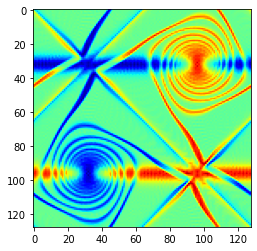

In [137]:
# plot the solution at the final timestamp
plt.imshow(omegaT, cmap='jet')